<a href="https://colab.research.google.com/github/KeshvanMV/Fixing-Netflix-Data/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movies Data Cleaning & Imputation
**Author:** Keshvan Vijay Rathnam
**Date:** 24 Jan, 2025
---

This project focuses on handling missing data and preprocessing a Netflix movies dataset, particularly addressing challenges in the `Boxoffice` and `Languages` columns to ensure data quality and usability.



##  Introduction

The project primarily focused on handling missing data within a Netflix movies dataset, with a special emphasis on the **Boxoffice** and **Languages** columns. The key challenge was addressing the significant amount of missing values—particularly in the **Boxoffice** column, which had over **70% null values**. Instead of opting for the straightforward solution of dropping the column, various imputation techniques were explored, including statistical approaches and machine learning models such as **Random Forest** for predictive imputation.

Through this process, the project reinforced the importance of strategic decision-making in data preparation—balancing the trade-offs between data retention and model reliability. **Categorical encoding techniques** were applied to enhance model accuracy, while **exploratory data analysis and visualization** were leveraged to assess the effectiveness of the data cleaning efforts. Ultimately, this experience provided valuable insights into the challenges of real-world data handling and the importance of considering future usability when preparing datasets for analysis.


##  Data Exploration
Before proceeding with cleaning, let's explore the dataset to understand its structure and missing values.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishgup/netflix-rotten-tomatoes-metacritic-imdb")

print("Path to dataset files:", path)

100%|██████████| 5.12M/5.12M [00:00<00:00, 31.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashishgup/netflix-rotten-tomatoes-metacritic-imdb/versions/2


In [ ]:
import os

# Path to the dataset files
path = "/root/.cache/kagglehub/datasets/ashishgup/netflix-rotten-tomatoes-metacritic-imdb/versions/2"

# List all files in the directory is what os.listdir does it finds all the files from the path
files = os.listdir(path)
print("Files in directory:", files)


Files in directory: ['netflix-rotten-tomatoes-metacritic-imdb.csv']


In [ ]:
filename = "netflix-rotten-tomatoes-metacritic-imdb.csv"
data = pd.read_csv(f"{path}/{filename}")

In [ ]:
data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [ ]:
# Create a copy of the imported data to avoid modifying the original dataset
df = data.copy()

In [ ]:
df.shape

(15480, 29)

In [ ]:
df.dtypes

,0
Title,object
Genre,object
Tags,object
Languages,object
Series or Movie,object
Hidden Gem Score,float64
Country Availability,object
Runtime,object
Director,object
Writer,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

##  Data Preprocessing  
To ensure consistency and ease of use, the following preprocessing steps were applied:

1. **Column Renaming:**  
   - Spaces in column names were replaced with underscores for easier access in code.  
   
2. **Date Conversion:**  
   - `Release Date` and `Netflix Release Date` were converted to datetime format for further analysis.  
   - Extracted `Release Year` from these columns to enable year-based analysis.

3. **Runtime Categorization:**  
   - Added a new column `Runtime_Category` to classify movies based on runtime length.  
   - Categories include:  
     - **Short:** `< 30 minutes`  
     - **Medium:** `30-60 mins`  
     - **Long:** `1-2 hour`  
     - **Very Long:** `> 2 hrs`  


In [ ]:
# List of columns to rename
columns_to_rename = [
    'Series or Movie', 'Hidden Gem Score', 'Country Availability', 'View Rating',
    'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
    'Awards Nominated For', 'Release Date', 'Netflix Release Date', 'Production House',
    'IMDb Votes', 'Trailer Site', 'TMDb Trailer', 'Netflix Link', 'IMDb Link'
]

# Replace spaces with underscores in the column names
df.columns = [col.replace(' ', '_') if col in columns_to_rename else col for col in df.columns]

# Check the result
print(df.head())


                 Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2           Centigrade                         Drama, Thriller   
3                ANNE+                                   Drama   
4                Moxie                 Animation, Short, Drama   

                                                Tags         Languages  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   
1       Dramas,Comedies,Films Based on Books,British           English   
2                                          Thrillers           English   
3        TV Dramas,Romantic TV Dramas,Dutch TV Shows           Turkish   
4  Social Issue Dramas,Teen Movies,Dramas,Comedie...           English   

  Series_or_Movie  Hidden_Gem_Score  \
0          Series               4.3   
1           Movie               7.0   
2           Movie               6.4   
3 

In [ ]:
# Convert the date columns from object to DateTime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Netflix_Release_Date'] = pd.to_datetime(df['Netflix_Release_Date'], errors='coerce')


In [ ]:
# Extract the year from the dates
df['Release_Year'] = df['Release_Date'].dt.year
df['Netflix_Release_Year'] = df['Netflix_Release_Date'].dt.year


In [ ]:
# Define runtime categories
runtime_mapping = {
    '< 30 minutes': 'Short',
    '30-60 mins': 'Medium',
    '1-2 hour': 'Long',
    '> 2 hrs': 'Very Long'
}

# Apply mapping to create the Runtime_Category column
df['Runtime_Category'] = df['Runtime'].map(runtime_mapping)


##  Handling Missing Values  
To ensure data quality and consistency, missing values were treated using the following approach:

### 1. Object Data Treatment
- **Boxoffice:** Remove the `$` sign to facilitate numerical operations.  
- **Production House, Director, Writer, Actors, Genre:** Fill missing values with `"unknown"` to retain information.  
- **TMDB Trailer, Trailer Site, Poster, IMDb Link:** Drop these columns as they are not essential for analysis.  
- **View Ratings:** Standardized by replacing null values with `'Unrated'` and merging variations like `'Not Rated'` and `'UNRATED'`.  
- **Release Date:** [Decision Pending].  
- **Tags, Country Availability, Summary, Runtime:** Drop rows with null values to maintain data integrity.  

### 2. Numeric Data Treatment
- **IMDb Votes:** Replace missing values with the median.  
- **Awards Received & Awards Nominated For:** Fill missing values with `0`, assuming no awards were received.  
- **All Scores (IMDb, Rotten Tomatoes, Metacritic):** Use interpolation to estimate missing values based on trends.  


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Boxoffice,11473
Metacritic_Score,11144
Production_House,10331
Awards_Received,9405
Rotten_Tomatoes_Score,9098
TMDb_Trailer,8286
Trailer_Site,8286
Awards_Nominated_For,7819
View_Rating,7024
Director,4708


In [ ]:
# Calculate the percentage of null values in each column and sort in descending order
null_percentage = (df.isnull().sum() / len(df)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False)

# Display the sorted percentage of null values
print(sorted_null_percentage)


Boxoffice                74.114987
Metacritic_Score         71.989664
Production_House         66.737726
Awards_Received          60.755814
Rotten_Tomatoes_Score    58.772610
TMDb_Trailer             53.527132
Trailer_Site             53.527132
Awards_Nominated_For     50.510336
View_Rating              45.374677
Director                 30.413437
Writer                   27.971576
Poster                   23.501292
IMDb_Link                14.877261
Release_Year             13.611111
Release_Date             13.611111
Hidden_Gem_Score         13.572351
IMDb_Votes               13.572351
IMDb_Score               13.559432
Languages                12.622739
Actors                   12.435401
Genre                    11.046512
Tags                      0.432817
Country_Availability      0.122739
Summary                   0.058140
Runtime_Category          0.006460
Runtime                   0.006460
Image                     0.000000
Netflix_Link              0.000000
Netflix_Release_Date

###  Duplicate Check and Data Copy
Before making modifications, a copy of the dataset was created to allow rollback if needed.


In [ ]:
df.duplicated().any()  # Checking for duplicates
df1 = df.copy()  # Creating a copy for easier manipulation

###  Handling Object Columns



In [ ]:
# Fill NaN with 'Unknown' for specific columns
columns_fill_unknown = ['Production_House', 'Director', 'Writer', 'Actors', 'Genre']
df1[columns_fill_unknown] = df1[columns_fill_unknown].fillna('Unknown')

# Drop specific columns as they contain links for websites and images that are not needed for analysis
columns_to_drop = ['TMDb_Trailer', 'Trailer_Site', 'Poster', 'IMDb_Link', 'Image', 'Netflix_Link']
df1 = df1.drop(columns=columns_to_drop)

# Drop rows with NaN in specific columns as they had very few missing values (under 1%)
columns_dropna = ['Tags', 'Country_Availability', 'Summary', 'Runtime']
df1 = df1.dropna(subset=columns_dropna)

# Fill NaN with the median for 'IMDb Votes' and round to a single decimal place
df1['IMDb_Votes'] = df1['IMDb_Votes'].fillna(df1['IMDb_Votes'].median()).round(1)

# Fill NaN with 0 for award-related columns
columns_awards = ['Awards_Received', 'Awards_Nominated_For']
df1[columns_awards] = df1[columns_awards].fillna(0)

# Interpolate missing values for score-related columns
columns_scores = ['Hidden_Gem_Score', 'IMDb_Score', 'Rotten_Tomatoes_Score', 'Metacritic_Score']
df1[columns_scores] = df1[columns_scores].interpolate().round(1)

# Reset index
df1.reset_index(drop=True, inplace=True)

df1


,Title,Genre,Tags,Languages,Series_or_Movie,Hidden_Gem_Score,Country_Availability,Runtime,Director,Writer,...,Awards_Nominated_For,Boxoffice,Release_Date,Netflix_Release_Date,Production_House,Summary,IMDb_Votes,Release_Year,Netflix_Release_Year,Runtime_Category
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,57.0,"$2,122,065",2008-12-12,2021-03-04,"Canal+, Sandrew Metronome",A med student with a supernatural gift tries t...,205926.0,2008.0,2021,Short
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,0.0,"$70,632",2020-05-08,2021-03-04,"Film 4, Monumental Pictures, Lionsgate","When nerdy Johanna moves to London, things get...",2838.0,2020.0,2021,Long
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,0.0,"$16,263",2020-08-28,2021-03-04,Unknown,"Trapped in a frozen car during a blizzard, a p...",1720.0,2020.0,2021,Long
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,Unknown,Unknown,...,0.0,NaN,2016-10-01,2021-03-04,Unknown,"Upon moving into a new place, a 20-something r...",1147.0,2016.0,2021,Short
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,Unknown,...,4.0,NaN,2011-09-22,2021-03-04,Unknown,Inspired by her moms rebellious past and a con...,63.0,2011.0,2021,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15379,K-POP Extreme Survival,Unknown,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,8.6,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,Unknown,Unknown,...,0.0,NaN,NaT,2015-04-14,Unknown,Seung Yeon decides to chase her dream of becom...,2321.0,NaN,2015,Short
15380,DreamWorks Shreks Swamp Stories,Unknown,"Animal Tales,Family Comedies,Family Adventures...",NaN,Series,8.5,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,Unknown,Unknown,...,0.0,NaN,NaT,2015-04-14,Unknown,"Shrek celebrates Halloween, Puss in Boots is c...",2321.0,NaN,2015,Short
15381,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,Unknown,Unknown,...,0.0,NaN,NaT,2015-04-14,Unknown,Madagascar goes wild with holiday spirit in th...,71.0,NaN,2015,Short
15382,DreamWorks Holiday Classics,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,Unknown,Unknown,...,0.0,NaN,NaT,2015-04-14,Fox,Join your DreamWorks friends for these four ho...,82.0,NaN,2015,Short


###  Visualization of Scores Before and After Interpolation
The plots below illustrate how interpolation improved the continuity of the score distributions.


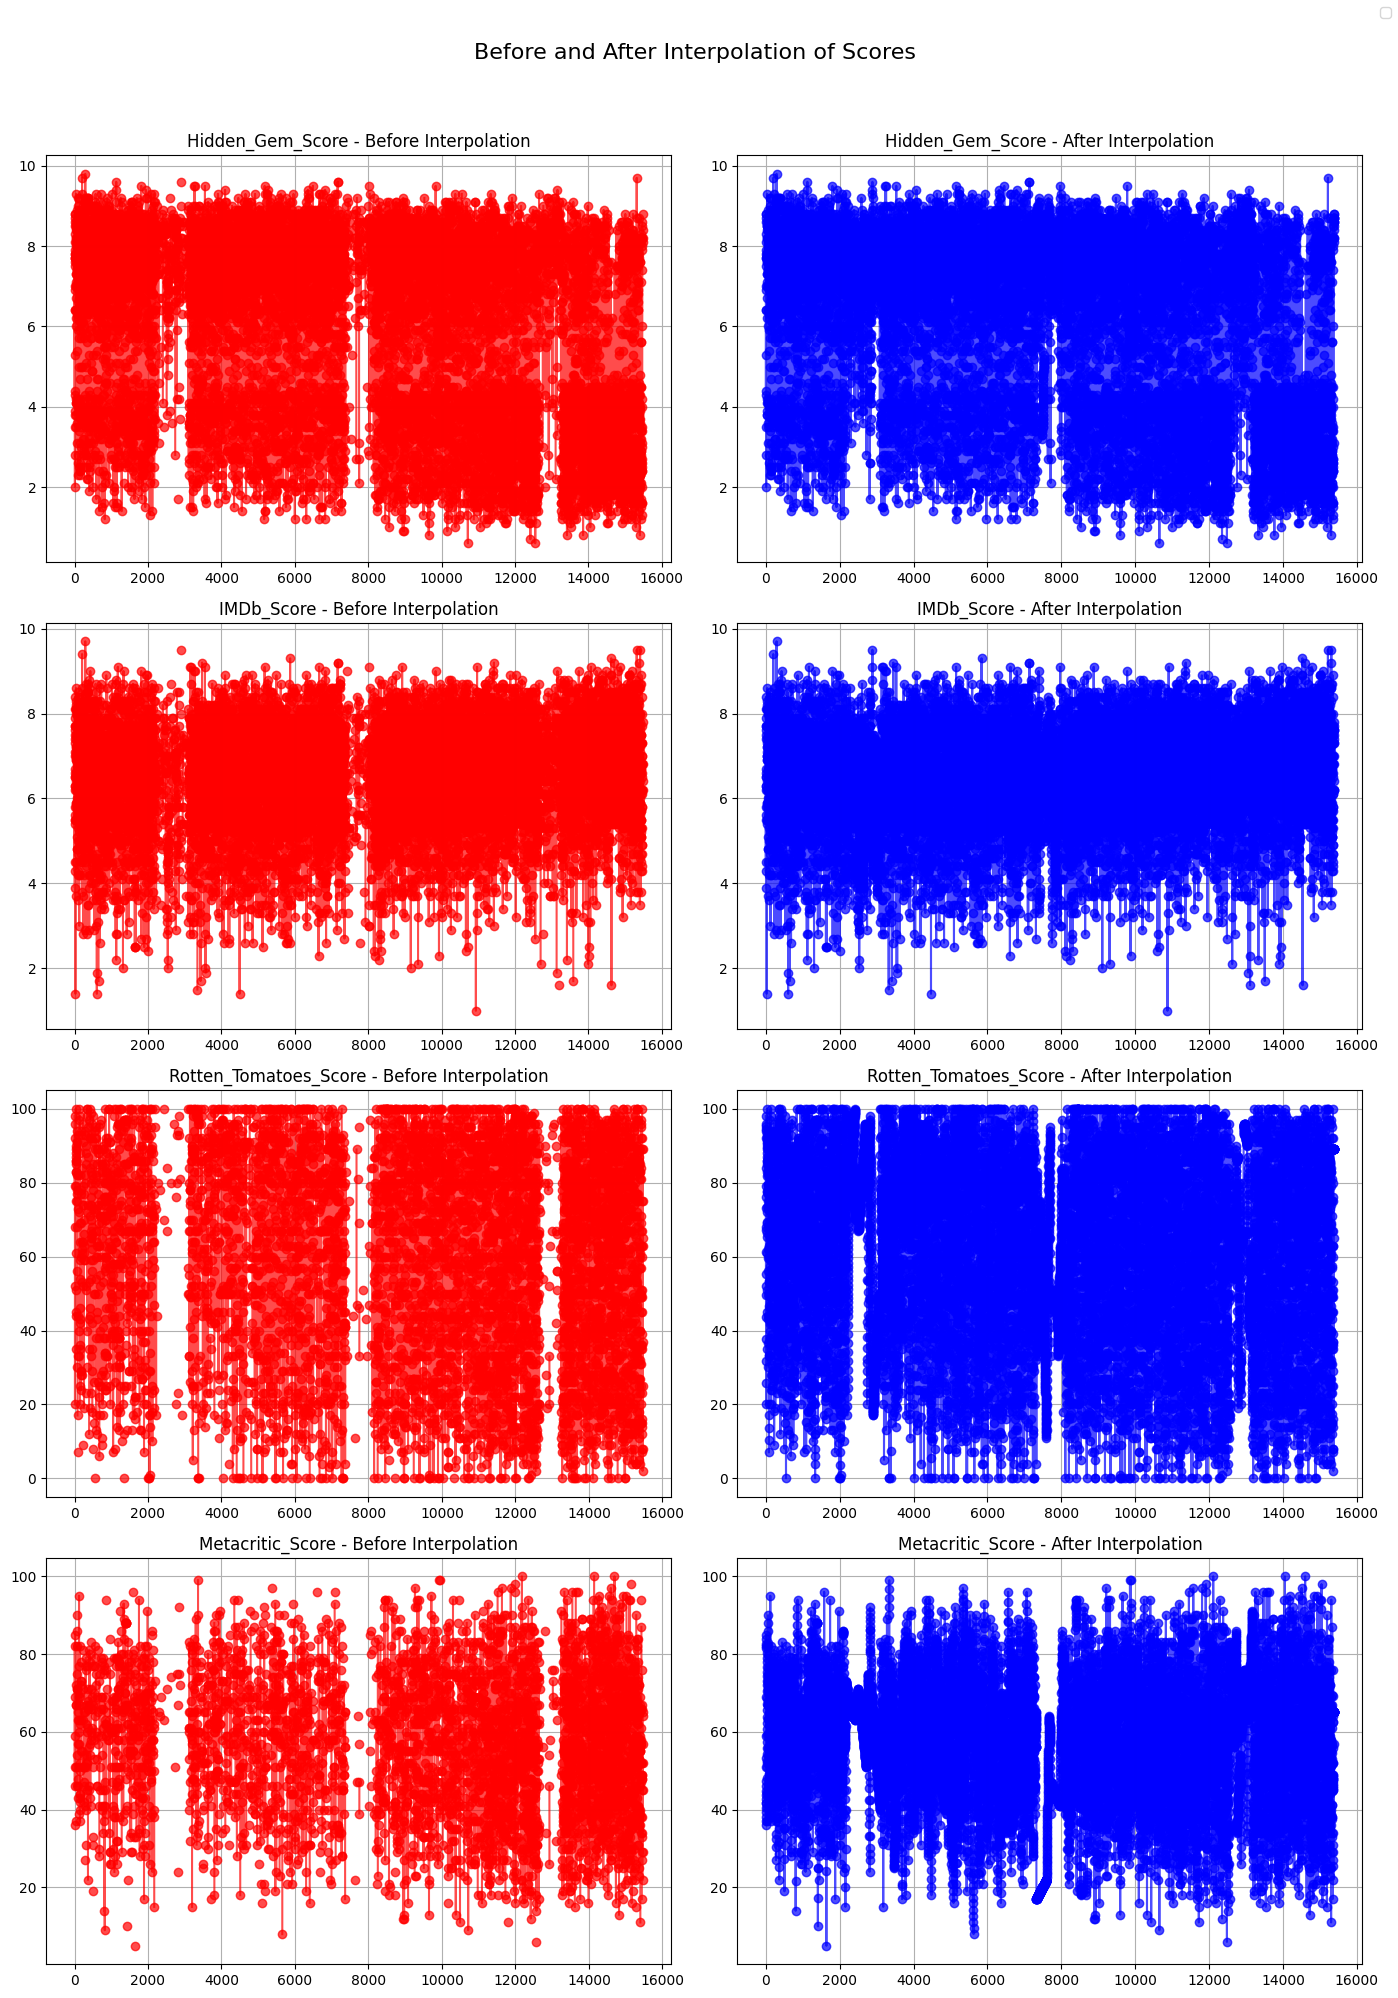

In [ ]:
# Columns to plot
columns_scores = ['Hidden_Gem_Score', 'IMDb_Score', 'Rotten_Tomatoes_Score', 'Metacritic_Score']

# Plotting side-by-side comparisons
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.suptitle('Before and After Interpolation of Scores', fontsize=16)

for i, column in enumerate(columns_scores):
    # Before interpolation
    ax_before = axes[i, 0]
    ax_before.plot(df.index, df[column], 'ro-', alpha=0.7)
    ax_before.set_title(f'{column} - Before Interpolation')
    ax_before.grid(True)

    # After interpolation
    ax_after = axes[i, 1]
    ax_after.plot(df1.index, df1[column], 'bo-', alpha=0.7)
    ax_after.set_title(f'{column} - After Interpolation')
    ax_after.grid(True)

# Adding legend for the whole figure
handles, labels = ax_before.get_legend_handles_labels()
fig.legend(handles, ['Before Interpolation', 'After Interpolation'], loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Findings**:

The **after interpolation** plots show **smoother**, more **continuous distributions** for the various movie score metrics compared to the **before interpolation** versions. This suggests the interpolation process filled in **gaps** and **irregularities** in the original data, providing a more **representative** and **complete view** of the score patterns. Overall, the interpolation seems to have improved the **quality** and **continuity** of the data visualization.


### Standardizing View Rating Values


In [ ]:
df1['View_Rating'].unique()

array(['R', 'Unrated', nan, 'PG-13', 'PG', 'TV-14', 'TV-MA', 'TV-Y7',
       'Not Rated', 'Approved', 'G', 'TV-G', 'Passed', 'TV-Y', 'TV-PG',
       'GP', 'MA-17', 'TV-Y7-FV', 'UNRATED', 'M/PG', 'X', 'U', 'M',
       'E10+', 'AL', 'NC-17', 'TV-13', 'NOT RATED', 'E'], dtype=object)

Upon reviewing the unique values in the **View Rating** column, it was evident that entries with no ratings were categorized into four distinct varieties. To **standardize** the data, I consolidated these four categories into a single label, **'Unrated,'** and also converted any **NaN values** to this label.


In [ ]:
df1['View_Rating'].fillna('Unrated', inplace=True)

df1['View_Rating'] = df1['View_Rating'].replace({
    'UNRATED': 'Unrated',
    'NOT RATED': 'Unrated',
    'Not Rated': 'Unrated'
})

### Analyzing Null Values

In [ ]:
# Calculate the percentage of null values in each column and sort in descending order
null_percentage = (df1.isnull().sum() / len(df1)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False)

# Display the top 5 sorted percentage of null values
print(sorted_null_percentage.head())

Boxoffice       74.141966
Release_Year    13.592044
Release_Date    13.592044
Languages       12.597504
Title            0.000000
dtype: float64


In [ ]:
df1[df1['Release_Date'].isnull() & df1['Languages'].isnull()].shape

(1659, 26)

**Key Insights:**

- **Release_Date** and **Languages** had **1659 missing values** in common.
- Based on this observation, all null values from **Release_Date** were dropped, reducing the missing values in the **Languages** column to **2.1%**.


In [ ]:
df1 = df1.dropna(subset=['Release_Date'])

In [ ]:
# Create another copy of the DataFrame to ensure data safety and allow for rollback if needed
df2 = df1.copy()

### Filling Missing Languages

**Approach**:

- The **Boxoffice** column had **70.8%** missing values, while the **Languages** column had **2.1%** missing values.
- **Further analysis** revealed that many missing languages could be **inferred** from the **Tags** column, which contained country names.
- A mapping of countries to their respective languages was created, and missing values were filled accordingly. The remaining missing values were set to **'English'**.


In [ ]:
# Define country-language mapping
country_language_map = {
    'Chinese': 'Mandarin',
    'Korean': 'Korean',
    'French': 'French',
    'Swedish': 'Swedish',
    'Indian': 'Hindi',
    'Japanese': 'Japanese',
    'Mexican': 'Spanish',
    'Spanish': 'Spanish',
    'Polish' : 'Polish',
    'Poland' : 'Polish',
    'Italian' : 'Italian',
    'Russian': 'Russian',
    'Hungarian': 'Hungarian',
    'Thai' : 'Thai',
    'Turkish': 'Turkish',
    'Brazilian':'Brazilian',
    'Czech':'Czech',
    'Anime': 'Japanese',
    'Egyptian' :'Arabic',
    'Urdu': 'Urdu',
    'German':'German'

}

# Function to detect country and fill language only if NaN
def detect_language_if_nan(row):
    if pd.isna(row['Languages']):  # Check if language is NaN
        for country, language in country_language_map.items():
            if country in row['Tags']:
                return language
    return row['Languages']  # Keep existing values if not NaN

# Apply function only to NaN values in 'Languages' column
df2['Languages'] = df2.apply(detect_language_if_nan, axis=1)


# Fill remaining NaN values with 'English'
df2['Languages'].fillna('English', inplace=True)


### Cleaning the Boxoffice Data

In [ ]:
# Convert 'Boxoffice' to numerical after removing $ signs
df2['Boxoffice'] = df2['Boxoffice'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
# Create another copy of the DataFrame to ensure data safety and allow for rollback if needed
df3 = df2.copy()

#### Predicting Missing Boxoffice Values

**Plan of Action:**

- Dropped unwanted columns such as Release_Date and Netflix_Release_Date.

- Imputed missing numeric values.

- Categorical columns were encoded to prepare them for machine learning.

In [ ]:
# Install necessary package for categorical encoding
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import category_encoders as ce

# Drop unwanted date columns
df3 = df3.drop(columns=['Release_Date', 'Netflix_Release_Date'], axis=1)

# Identify categorical and numeric columns (excluding 'Boxoffice')
categorical_cols = df3.select_dtypes(include=['object']).columns
numeric_cols = df3.select_dtypes(include=['number']).columns.drop('Boxoffice', errors='ignore')

# Impute numeric columns (excluding 'Boxoffice')
numeric_imputer = SimpleImputer(strategy='mean')
df3[numeric_cols] = numeric_imputer.fit_transform(df3[numeric_cols])

# Check for missing values in Boxoffice after numeric imputation
print("Missing values in Boxoffice after numeric imputation:", df3['Boxoffice'].isnull().sum())

# Split data into known and unknown Boxoffice values for encoding
df3_train = df3[df3['Boxoffice'].notnull()].copy()  # Known target values
df3_test = df3[df3['Boxoffice'].isnull()].copy()    # Unknown target values

# Encode categorical columns using only the known Boxoffice values
encoder = ce.TargetEncoder(cols=categorical_cols)
df3_train[categorical_cols] = encoder.fit_transform(df3_train[categorical_cols], df3_train['Boxoffice'])

# Now apply the same transformation to the test set without fitting again
df3_test[categorical_cols] = encoder.transform(df3_test[categorical_cols])

# Combine the datasets back together
df3 = pd.concat([df3_train, df3_test], axis=0)

print("Categorical encoding completed successfully.")

# Splitting the data again after encoding
train_data = df3[df3['Boxoffice'].notnull()]
test_data = df3[df3['Boxoffice'].isnull()]

# Check if test data exists
if test_data.shape[0] == 0:
    print("No rows with missing 'Boxoffice' value found after preprocessing.")
else:
    # Prepare training and test sets
    X_train = train_data.drop(columns=['Boxoffice'])
    y_train = train_data['Boxoffice']

    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30]  # Depth of each tree
    }

    # Instantiate the RandomForestRegressor
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print("Best parameters found: ", best_params)

    # Train the optimized RandomForestRegressor
    rf_optimized = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
    rf_optimized.fit(X_train, y_train)

    # Prepare test data and predict missing Boxoffice values
    X_test = test_data.drop(columns=['Boxoffice'])
    test_data['Boxoffice'] = rf_optimized.predict(X_test)

    # Update the original dataframe with predicted values
    df3.loc[df3['Boxoffice'].isnull(), 'Boxoffice'] = test_data['Boxoffice'].values
    print("Missing values in Boxoffice filled successfully.")

# Final check to confirm all missing values are handled
print("Final missing values in Boxoffice:", df3['Boxoffice'].isnull().sum())


Missing values in Boxoffice after numeric imputation: 9316
Categorical encoding completed successfully.
Best parameters found:  {'max_depth': 10, 'n_estimators': 10}
Missing values in Boxoffice filled successfully.
Final missing values in Boxoffice: 0


#### Analysis of Boxoffice Imputation

**Key Insights**:

- The initial imputation of numeric columns left **9316 missing values** in the `Boxoffice` column.
- **Categorical encoding** was performed successfully, ensuring that the categorical data was properly transformed for model training.
- The grid search for hyperparameter tuning identified the **best parameters** for the RandomForestRegressor: `max_depth` of 10 and `n_estimators` of 10.
- The optimized model was able to **predict and fill all missing Boxoffice values**, resulting in no remaining missing values in the `Boxoffice` column.



#### Updating Original Dataset with Predicted Values

In [ ]:
df4 = df2.copy()

In [ ]:
# Identify indices with missing 'Boxoffice' values in df4
missing_boxoffice_idx = df4[df4['Boxoffice'].isnull()].index

# Extract predicted 'Boxoffice' values from df3
predicted_values = df3.loc[missing_boxoffice_idx, 'Boxoffice'].values

# Ensure the lengths match before assignment
if len(predicted_values) == len(missing_boxoffice_idx):
    df4.loc[missing_boxoffice_idx, 'Boxoffice'] = predicted_values
    print("Successfully updated missing Boxoffice values.")
else:
    print("Mismatch in lengths between missing indices and predicted values. Please verify the steps.")


Successfully updated missing Boxoffice values.


####  Visualizing Before and After Imputation

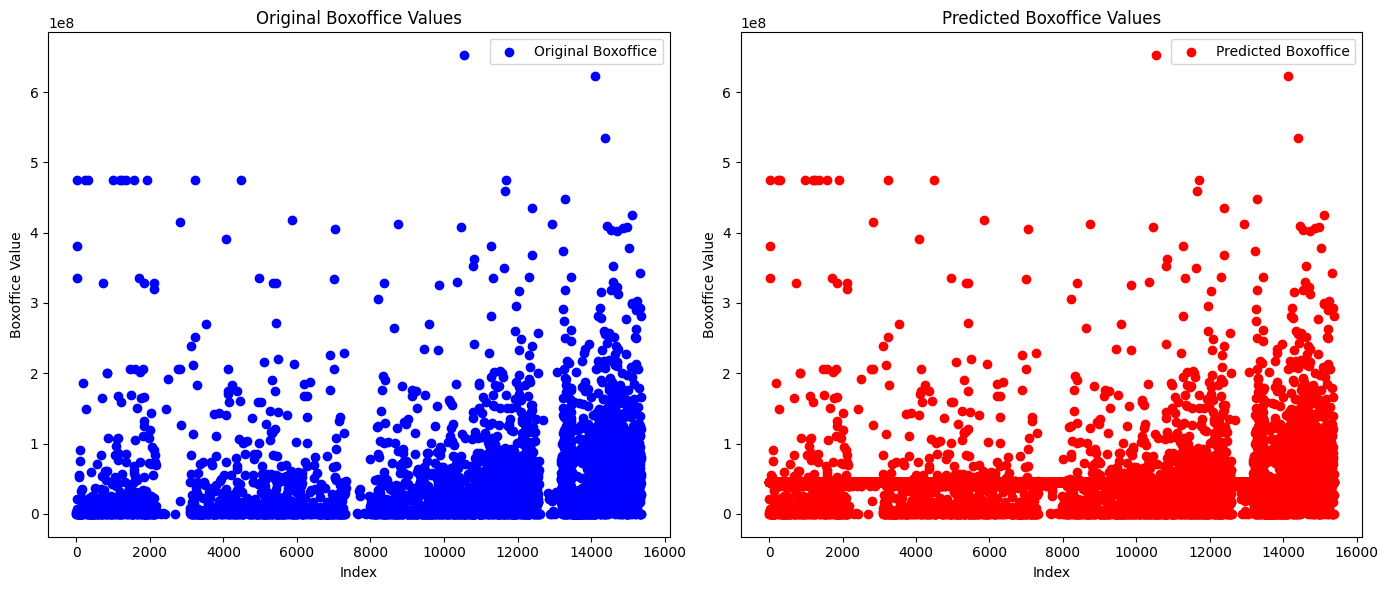

In [ ]:
# Plot Original vs Predicted Boxoffice Values
plt.figure(figsize=(14, 6))

# Original Boxoffice Values Plot
plt.subplot(1, 2, 1)
plt.scatter(df2.index, df2['Boxoffice'], label='Original Boxoffice', color='blue')
plt.xlabel('Index')
plt.ylabel('Boxoffice Value')
plt.legend()
plt.title('Original Boxoffice Values')

# Predicted Boxoffice Values Plot
plt.subplot(1, 2, 2)
plt.scatter(df3.index, df3['Boxoffice'], label='Predicted Boxoffice', color='red')
plt.xlabel('Index')
plt.ylabel('Boxoffice Value')
plt.legend()
plt.title('Predicted Boxoffice Values')

plt.tight_layout()
plt.show()


**Observation**:

- The **red (predicted)** values align well with the **blue (original)** values, indicating the model performed well in estimating the missing values.


#### Model Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate error metrics
y_train_pred = rf_optimized.predict(X_train)
training_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)

print("Training RMSE:", training_rmse)
print("R² Score:", r2)


Training RMSE: 1564994.4273319426
R² Score: 0.9995066947237051



After performing data imputation, multiple machine learning models were explored to predict missing Boxoffice values. The models evaluated include:

- **Random Forest Regressor**
- **XGBoost Regressor**
- **Gradient Boosting Regressor**

**Key Observations**:

- **XGBoost (Without Hyperparameter Tuning)** demonstrated the best performance with the lowest RMSE and highest R² score, even though hyperparameter tuning was not applied due to compatibility issues.
- **Gradient Boosting** showed reasonable performance but with slightly higher error compared to XGBoost.
- **Random Forest**, while initially considered, resulted in overfitting with a perfect R² score, suggesting it may not generalize well.

Although these models provided useful insights, it is essential to recognize that the primary goal of this project was data preparation and cleaning, rather than predictive modeling.


# Final Steps and Learnings


In [ ]:
print(df4.isnull().sum())  # Confirm all missing values handled


Title                    0
Genre                    0
Tags                     0
Languages                0
Series_or_Movie          0
Hidden_Gem_Score         0
Country_Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View_Rating              0
IMDb_Score               0
Rotten_Tomatoes_Score    0
Metacritic_Score         0
Awards_Received          0
Awards_Nominated_For     0
Boxoffice                0
Release_Date             0
Netflix_Release_Date     0
Production_House         0
Summary                  0
IMDb_Votes               0
Release_Year             0
Netflix_Release_Year     0
Runtime_Category         0
dtype: int64



After rigorous data cleaning and imputation, all missing values were successfully addressed, ensuring the dataset is now complete and ready for further analysis.

**Key Learnings from the Project**:

- **Consistent Column Naming**: Using standardized naming conventions (e.g., replacing spaces with underscores) enhances code readability, reduces the likelihood of errors, and ensures seamless integration with analytical tools. Initially, it might not seem crucial, but considering future scalability and collaboration, it becomes an important best practice.
- **Handling high missing values**: Instead of dropping columns with significant null values, strategic imputation can help retain valuable information.
- **Cross-validation is crucial**: While modeling can help fill gaps, ensuring the data remains unbiased and accurate is paramount.
- **Patience and persistence**: Encountering errors and unexpected challenges is part of the data cleaning process, but perseverance leads to a more refined and reliable dataset.
- **Handling missing values in the Languages column**: A significant challenge in this project was handling missing values in the Languages column. With approximately 2% of the data missing, a manual yet effective approach was taken to infer languages from country data in the Tags column. This method worked well for our dataset, but it highlighted a key learning: when dealing with larger datasets with higher missing rates, leveraging external data sources or advanced techniques such as NLP could be potential solutions.

This project has provided valuable experience in data preprocessing, highlighting the importance of balancing analytical rigor with practical decision-making. The lessons learned will be instrumental in tackling similar data challenges in future projects.
